# Benchmark results on spectral alignment

In [1]:
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib as mpl


import sys
sys.path.append('../../src/')
from ms_similarity_metrics.similarity_weighted import modified_cosine

from awswrangler import s3

In [1]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.info')   

In [2]:
mpl.rcParams['figure.dpi'] = 400

# Read in data

 Benchmark metrics without weights

In [3]:
benchmark_df = pd.read_parquet(
    's3://enveda-data-user/chloe.engler/cosine_similarity/network_method/benchmark_metrics.parquet'
)
benchmark_df.head(2)

,pair1,pair2,id1,id2,entropy,unweighted_entropy,euclidean,manhattan,chebyshev,squared_euclidean,...,wave_hedges,jaccard,dice,inner_product,divergence,avg_l,vicis_symmetric_chi_squared_3,ms_for_id_v1,ms_for_id,weighted_dot_product
0,40270,47569,CCMSLIB00005764815,CCMSLIB00005777350,0.15707,0.140656,0.667589,9.513372e-02,0.587903,0.889503,...,0.007473,2.549249e-02,4.971772e-02,0.005781,0.003816,0.0,0.119277,0.504642,0.0,0.022946
1,54328,50074,CCMSLIB00006115078,CCMSLIB00000569787,0.00000,0.000000,0.102491,5.960464e-08,0.101499,0.194478,...,0.090909,5.960464e-08,5.960464e-08,0.000000,0.047619,0.0,0.000000,0.000000,0.0,0.000000


Benchmark metrics applying weights

In [4]:
weighted_benchmark_df = pd.read_parquet('s3://enveda-data-user/chloe.engler/cosine_similarity/network_method/weighted_benchmark_metrics.parquet')
weighted_benchmark_df.head(2)

,pair1,pair2,id1,id2,entropy,unweighted_entropy,euclidean,manhattan,chebyshev,squared_euclidean,...,wave_hedges,jaccard,dice,inner_product,divergence,avg_l,vicis_symmetric_chi_squared_3,ms_for_id_v1,ms_for_id,weighted_dot_product
0,40270,47569,CCMSLIB00005764815,CCMSLIB00005777350,0.165306,0.165346,0.813237,0.077822,0.900197,0.96512,...,0.007419,0.072405,0.135033,0.005445,0.003789,0.0,0.110276,0.633662,0.0,0.077429
1,54328,50074,CCMSLIB00006115078,CCMSLIB00000569787,0.000000,0.000000,0.465772,0.000000,0.462964,0.71460,...,0.090909,0.000000,0.000000,0.000000,0.047619,0.0,0.000000,0.000000,0.0,0.000000


# Get tanimoto similarity

In [5]:
similarities = s3.read_csv(
    's3://enveda-data-user/chloe.engler/cosine_similarity/network_method/similarities_10m.csv', 
    index_col=0,
)
similarities.head(2)

,pair1,pair2,id1,id2,smiles1,smiles2,charge1,charge2,mz1,mz2,weighted_modified_cosine,weighted_modified_cosine_explained,tanimoto,modified_cosine,modified_cosine_explained,weighted_difference,tanimoto_interval,weighted_tanimoto_diff,modified_tanimoto_diff
0,40270,47569,CCMSLIB00005764815,CCMSLIB00005777350,CCOC1=C(C=CC(=C1)C(C)(C)C)C1COC(=N1)C1=C(F)C=C...,CC1=C(C(CCC1)(C)C)/C=C/C(=C/C=C/C(=C/C=C/C=C(\...,1,1,360.177,536.438,0.239253,0.231622,0.117092,0.143641,0.223221,0.095612,0.0–0.2,0.122162,0.026550
1,54328,50074,CCMSLIB00006115078,CCMSLIB00000569787,COC(=O)Cc1c[nH]c2c1cccc2,CC(C)(C)C(C(CC1=CC=C(C=C1)Cl)N2C=NC=N2)O,1,1,190.086,294.137,0.000000,0.000000,0.185668,0.000000,0.000000,0.000000,0.0–0.2,0.185668,0.185668


Add tanimoto similarities to the two other dataframes (weights and without weights)

In [6]:
weighted_benchmark_df = weighted_benchmark_df.merge(similarities[['pair1', 'pair2', 'tanimoto']], on=['pair1', 'pair2'], how='inner')
benchmark_df = benchmark_df.merge(similarities[['pair1', 'pair2', 'tanimoto']], on=['pair1', 'pair2'], how='inner')
benchmark_df.head(2)

,pair1,pair2,id1,id2,entropy,unweighted_entropy,euclidean,manhattan,chebyshev,squared_euclidean,...,jaccard,dice,inner_product,divergence,avg_l,vicis_symmetric_chi_squared_3,ms_for_id_v1,ms_for_id,weighted_dot_product,tanimoto
0,40270,47569,CCMSLIB00005764815,CCMSLIB00005777350,0.15707,0.140656,0.667589,9.513372e-02,0.587903,0.889503,...,2.549249e-02,4.971772e-02,0.005781,0.003816,0.0,0.119277,0.504642,0.0,0.022946,0.117092
1,54328,50074,CCMSLIB00006115078,CCMSLIB00000569787,0.00000,0.000000,0.102491,5.960464e-08,0.101499,0.194478,...,5.960464e-08,5.960464e-08,0.000000,0.047619,0.0,0.000000,0.000000,0.0,0.000000,0.185668


In [7]:
# Remove rows with tanimoto = NaN (a few smiles strings are invalid)
benchmark_df = benchmark_df.loc[~benchmark_df['tanimoto'].isna()]
weighted_benchmark_df = weighted_benchmark_df.loc[~weighted_benchmark_df['tanimoto'].isna()]
similarities = similarities.loc[~similarities['tanimoto'].isna()]

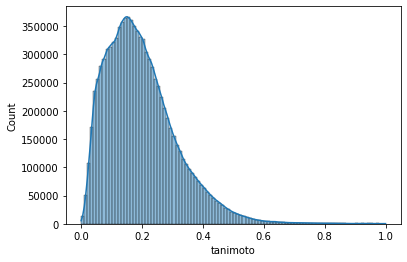

In [8]:
# Plot distributino of tanimoto coeffients
sns.histplot(
    similarities['tanimoto'],
    bins=100,
    kde=True,
)
plt.show()

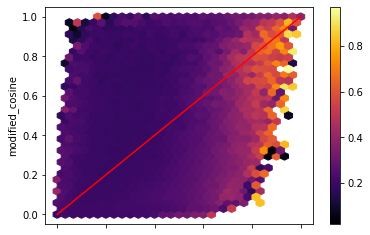

In [9]:
# PLot correlation between with seaborn between tanimoto and weighted dot product
similarities.plot.hexbin('weighted_modified_cosine', 'modified_cosine', C='tanimoto', gridsize=30, cmap='inferno')
plt.plot([0,1], [0,1], c='red')
plt.show()

In the comparison between weights and non weights for modified cosine similarity, you can see how pairs with high tanimoto coefficient (structurally similarity)
genereally get a higher score with the weights (i.e., yellow colors are more present on the right side of the image than the left side).

### Plot the distributions of similarity metrics binned by Tanimoto similarity 

In [10]:
# Add a prefix to the column names of weighted_benchmark_df with 'weighted_' except for the following columns 
# pair1	pair2	id1	id2

weighted_benchmark_df.columns = [
    'weighted_' + col
    if col not in ['pair1', 'pair2', 'id1', 'id2']
    else col
    for col in weighted_benchmark_df.columns
]

Merge all the dataframes into one to make comparisons

In [11]:
# Add benchmark_df (no weights)
all_similarities = similarities.merge(benchmark_df, on=['pair1', 'pair2'], how='left')

In [12]:
# Add weighted_benchmark_df (with weights)
all_similarities = all_similarities.merge(weighted_benchmark_df, on=['pair1', 'pair2'], how='left')

In [13]:
# Bin tanimoto into 5 bins
all_similarities["tanimoto_interval"] = pd.cut(
    all_similarities["tanimoto_x"],
    5,
    labels=["0.0–0.2", "0.2–0.4", "0.4–0.6", "0.6–0.8", "0.8–1.0"],
)

Plot differences between weight and unweighting versions

In [14]:
# Select metrics that are performing good already (otherwise there are too many to plot)
best_metrics = [
    "modified_cosine",
    'entropy',
    'bhattacharya_1',
    'fidelity',
]

# Append to the list the same names but with 'weighted_' prefix
best_metrics_duplicates = best_metrics + ['weighted_' + metric for metric in best_metrics]

In [15]:
similarities_tanimoto = pd.melt(
    all_similarities,
    id_vars="tanimoto_interval",
    value_vars=best_metrics_duplicates,
)

### Figure 2

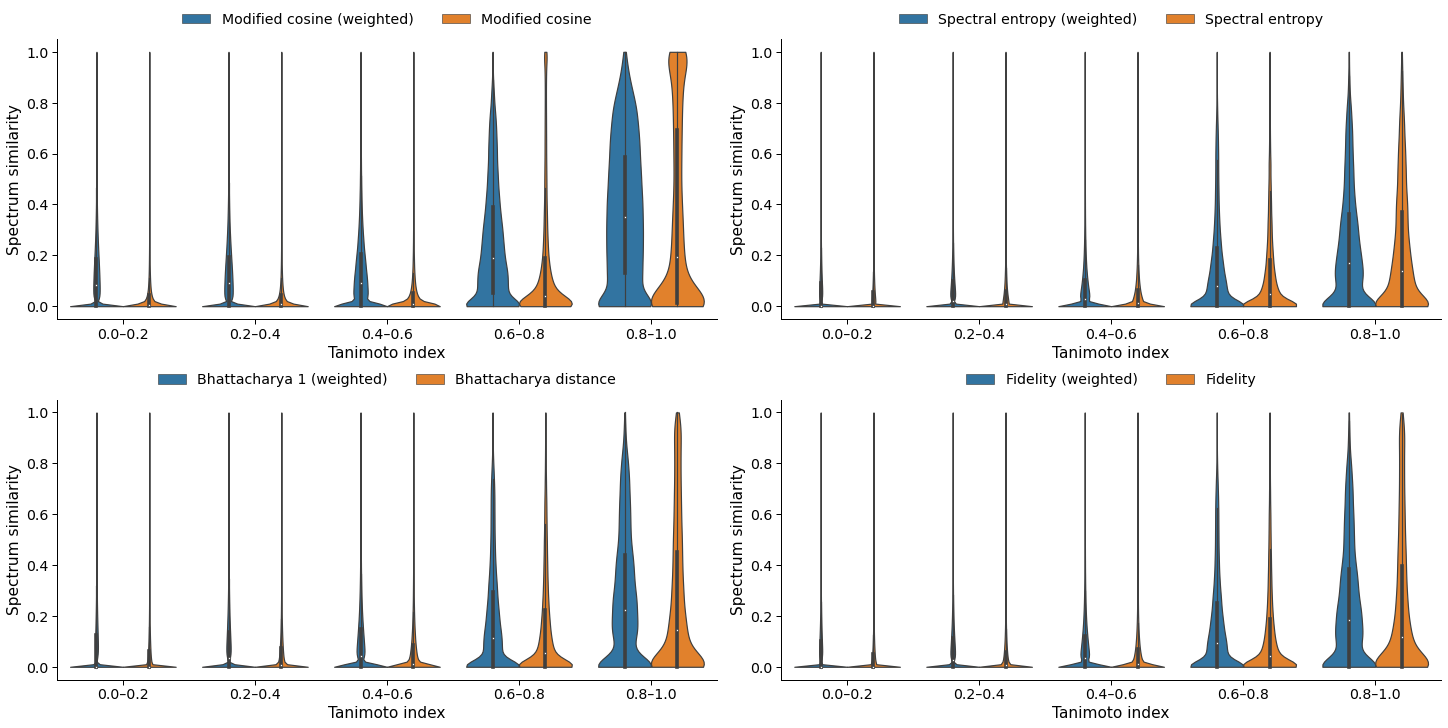

In [16]:
with sns.plotting_context("paper", font_scale=1.6):

    label_dict = {
        "modified_cosine": "Modified cosine",
        "weighted_modified_cosine": "Modified cosine (weighted)",
        "entropy": "Spectral entropy",
        "weighted_entropy": "Spectral entropy (weighted)",
        "bhattacharya_1": "Bhattacharya distance",
        "weighted_bhattacharya_1": "Bhattacharya 1 (weighted)",
        "fidelity": "Fidelity",
        "weighted_fidelity": "Fidelity (weighted)",
    }

    fig = plt.figure(constrained_layout=True, figsize=(20, 10))

    gs = GridSpec(2, 2, figure=fig)

    ax = fig.add_subplot(gs[0, 0])

    """ Modified cosine similarity """
    sns.violinplot(
        data=similarities_tanimoto,
        x="tanimoto_interval",
        y="value",
        hue="variable",
        hue_order=["weighted_modified_cosine", "modified_cosine"],
        cut=0,
        scale="width",
        scale_hue=False,
        ax=ax,
    )
    ax.set_xlabel("Tanimoto index")
    ax.set_ylabel("Spectrum similarity")
    for label in ax.legend().get_texts():
        label.set_text(
            label_dict[label.get_text()]
        )

    sns.move_legend(
        ax,
        "lower center",
        bbox_to_anchor=(.5, 1),
        ncol=3,
        title=None,
        frameon=False,
    )

    sns.despine(ax=ax)

    """Spectral Entropy """
    
    ax = fig.add_subplot(gs[0, 1])

    sns.violinplot(
        data=similarities_tanimoto,
        x="tanimoto_interval",
        y="value",
        hue="variable",
        hue_order=["weighted_entropy", "entropy"],
        cut=0,
        scale="width",
        scale_hue=False,
        ax=ax,
    )
    ax.set_xlabel("Tanimoto index")
    ax.set_ylabel("Spectrum similarity")
    for label in ax.legend().get_texts():
        label.set_text(
            label_dict[label.get_text()]
        )

    sns.move_legend(
        ax,
        "lower center",
        bbox_to_anchor=(.5, 1),
        ncol=3,
        title=None,
        frameon=False,
    )

    sns.despine(ax=ax)

    """ bhattacharya_1 """
    ax = fig.add_subplot(gs[1, 0])

    sns.violinplot(
        data=similarities_tanimoto,
        x="tanimoto_interval",
        y="value",
        hue="variable",
        hue_order=["weighted_bhattacharya_1", "bhattacharya_1"],
        cut=0,
        scale="width",
        scale_hue=False,
        ax=ax,
    )
    ax.set_xlabel("Tanimoto index")
    ax.set_ylabel("Spectrum similarity")
    for label in ax.legend().get_texts():
        label.set_text(
            label_dict[label.get_text()]
        )

    sns.move_legend(
        ax,
        "lower center",
        bbox_to_anchor=(.5, 1),
        ncol=3,
        title=None,
        frameon=False,
    )

    sns.despine(ax=ax)

    """fidelity"""
    ax = fig.add_subplot(gs[1, 1])

    sns.violinplot(
        data=similarities_tanimoto,
        x="tanimoto_interval",
        y="value",
        hue="variable",
        hue_order=["weighted_fidelity", "fidelity"],
        cut=0,
        scale="width",
        scale_hue=False,
        ax=ax,
    )
    ax.set_xlabel("Tanimoto index")
    ax.set_ylabel("Spectrum similarity")
    for label in ax.legend().get_texts():
        label.set_text(
            label_dict[label.get_text()]
        )

    sns.move_legend(
        ax,
        "lower center",
        bbox_to_anchor=(.5, 1),
        ncol=3,
        title=None,
        frameon=False,
    )

    sns.despine(ax=ax)

    # # Save figure.
    plt.savefig("benchmark_metrics.png", dpi=400, bbox_inches="tight")
    plt.show()
    plt.close()

Plot all metrics to see which one is correlating better with Tanimoto coeficient

In [17]:
# Select metrics that are performing good already (otherwise there are too many to plot)
other_metrics = [
    'entropy',
    'unweighted_entropy',
    'dice',
    'manhattan',
    'fidelity',
    'matusita',
    'squared_chord',
    'bhattacharya_1',
    'bhattacharya_2',
    'harmonic_mean',
    'probabilistic_symmetric_chi_squared',
    'ruzicka',
    'roberts',
    'intersection',
    'motyka',
    'canberra',
]

# Append to the list the same names but with 'weighted_' prefix
other_metrics_duplicate = other_metrics + ['weighted_' + metric for metric in other_metrics]

In [18]:
similarities_tanimoto_others = pd.melt(
    all_similarities,
    id_vars="tanimoto_interval",
    value_vars=other_metrics_duplicate,
)

# The ones below are not in the plot because they are not performing well
# Euclidian (it looks the same for all tanimoto coefficients) (correlation 0.17 (weighted) and 0.14)
# 'chebyshev',
# 'squared_euclidean',
# pearson_correlation
#  'lorentzian',
#  'penrose_shape', 
# 'clark',
# 'hellinger', 
# 'whittaker_index_of_association', 
# 'symmetric_chi_squared',


100%|██████████| 16/16 [23:50<00:00, 89.38s/it]


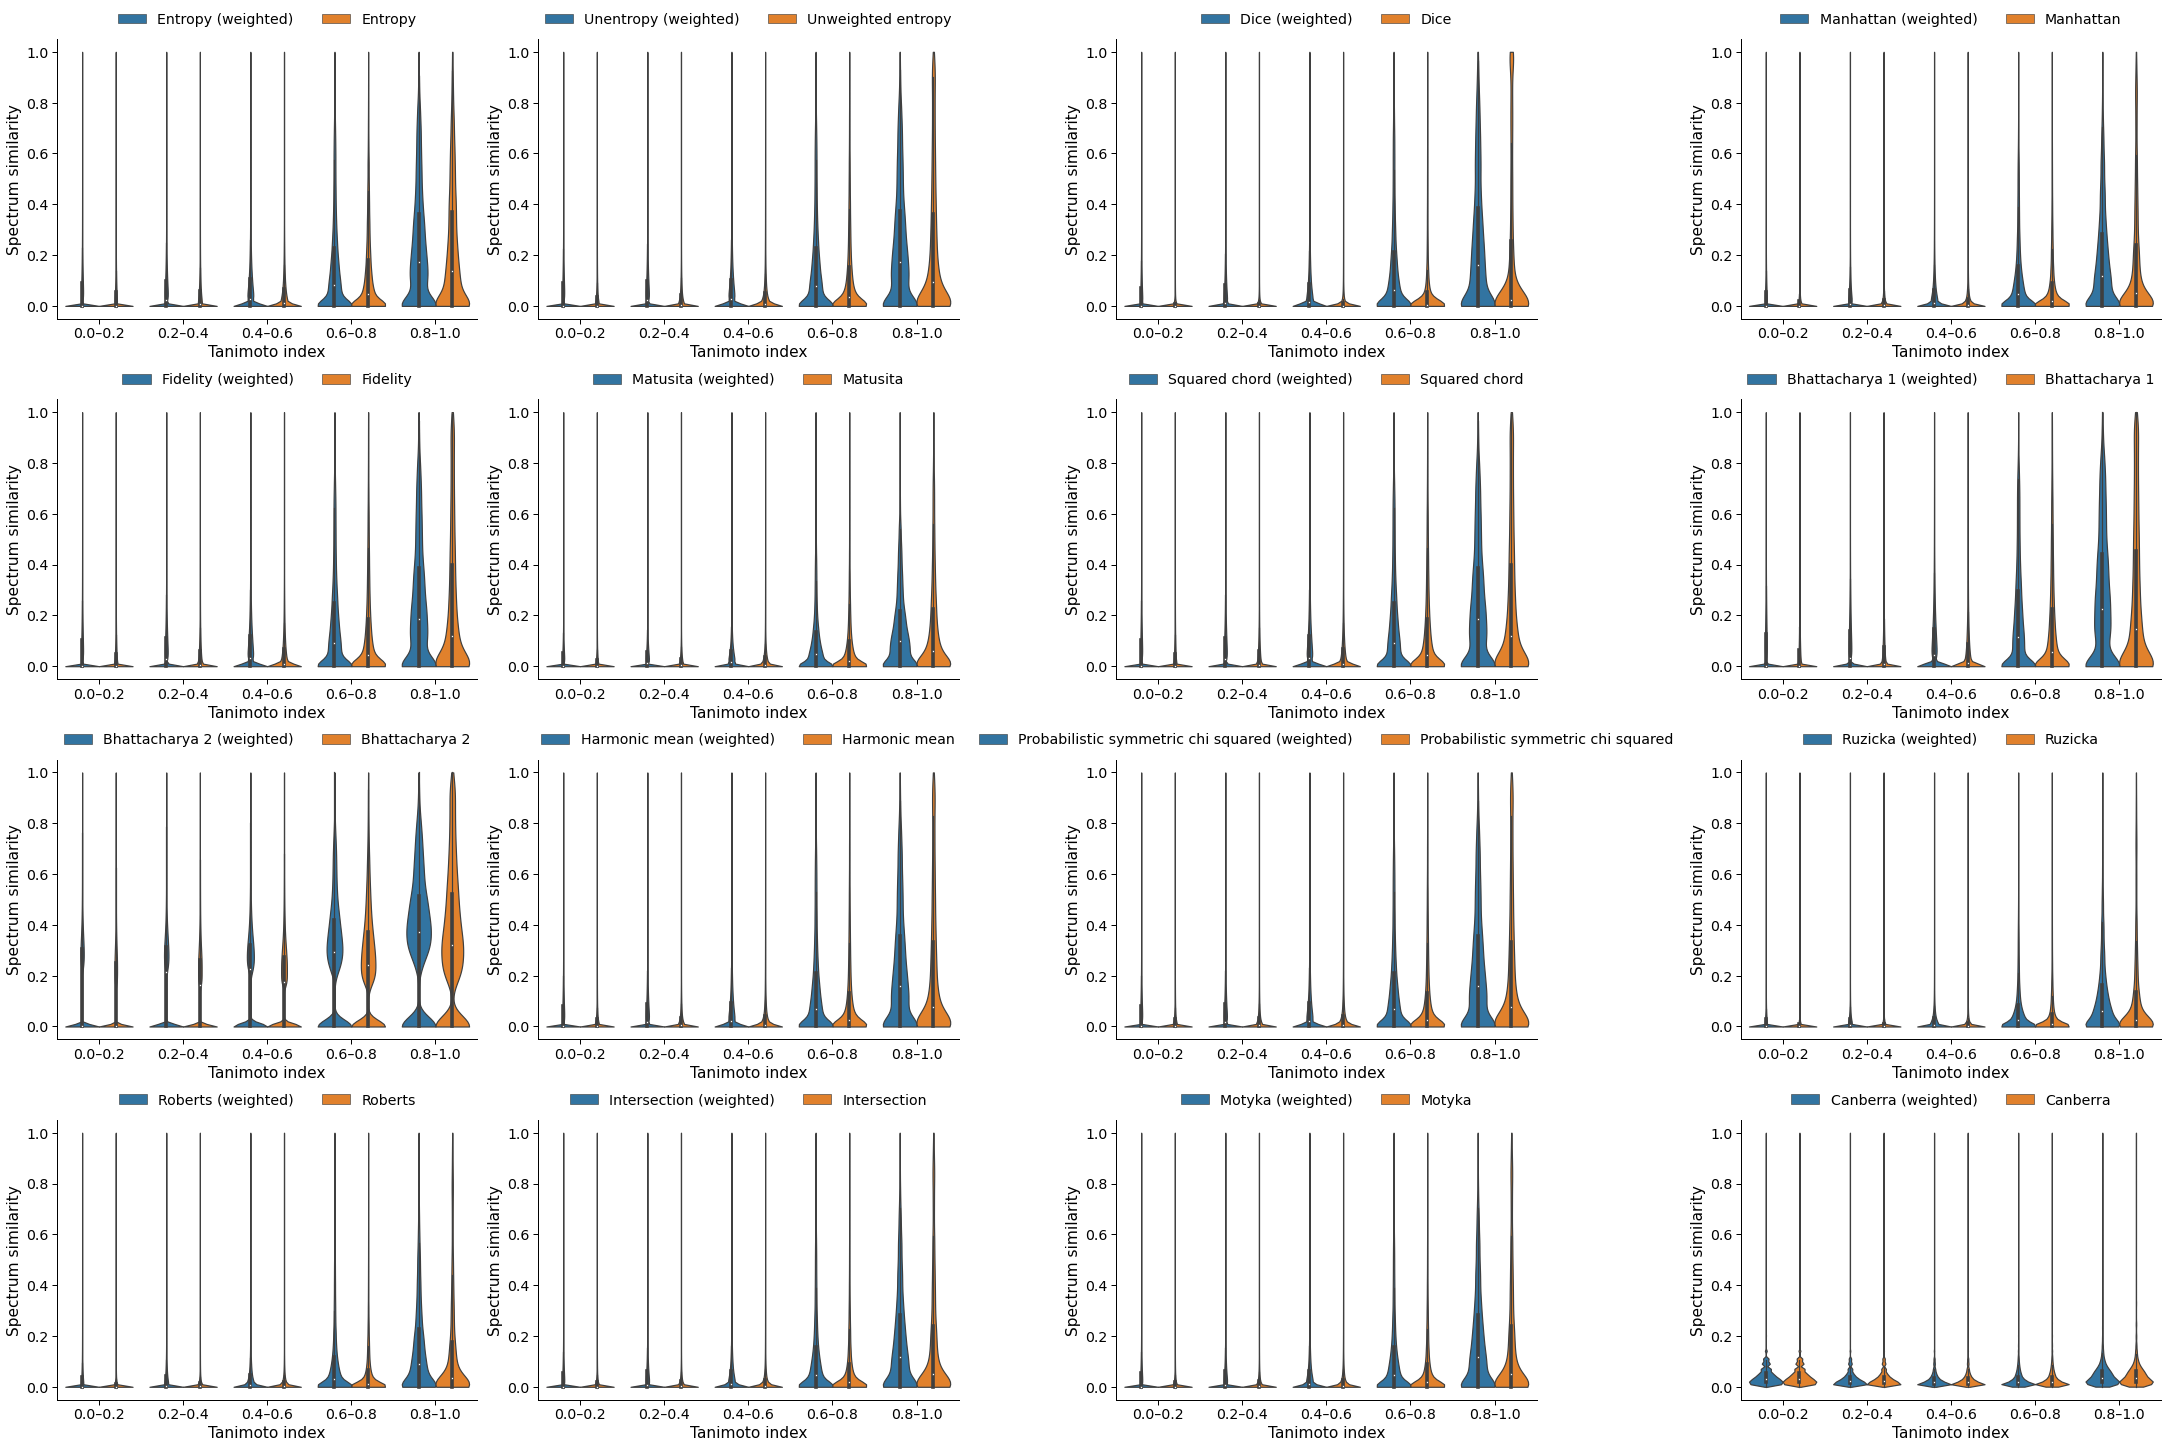

In [19]:
with sns.plotting_context("paper", font_scale=1.6):
    fig = plt.figure(constrained_layout=True, figsize=(30, 20))

    gs = GridSpec(4, 4, figure=fig)

    # Make a for loop for the 16 plots
    for i, metric in tqdm(enumerate(other_metrics), total=len(other_metrics)):

        # Get the correct position on a 4x4 grid
        ax = fig.add_subplot(gs[i // 4, i % 4])

        sns.violinplot(
            data=similarities_tanimoto_others,
            x="tanimoto_interval",
            y="value",
            hue="variable",
            hue_order=["weighted_" + metric, metric],
            cut=0,
            scale="width",
            scale_hue=False,
            ax=ax,
        )
        ax.set_xlabel("Tanimoto index")
        ax.set_ylabel("Spectrum similarity")
        for label in ax.legend().get_texts():

            if label.get_text().startswith('weighted_'):
                # remove weighted_ prefix
                new_label = label.get_text().replace("weighted_", "").replace("_", " ").capitalize()
                # add ' (weighted)' at the end
                new_label = new_label + ' (weighted)'
            
            else:
                new_label = label.get_text().replace("_", " ").capitalize()

            label.set_text(new_label)

        sns.move_legend(
            ax,
            "lower center",
            bbox_to_anchor=(.5, 1),
            ncol=3,
            title=None,
            frameon=False,
        )

        sns.despine(ax=ax)

    # Save figure.
    plt.savefig("benchmark_metrics_others.png", dpi=450)
    plt.show()
    plt.close()

Investigating pairs with modified cosine similarity where the weights improve the results

In [20]:
# Get subset of all similarities with tanimoto > 0.8
all_similarities_high_tanimoto = all_similarities.loc[all_similarities['tanimoto_x'] > 0.8]

# Add a new column with the difference between the weighted and unweighted modified cosine
all_similarities_high_tanimoto['modified_cosine_difference'] = all_similarities_high_tanimoto['weighted_modified_cosine'] - all_similarities_high_tanimoto['modified_cosine']

all_similarities_high_tanimoto['entropy_difference'] = all_similarities_high_tanimoto['weighted_entropy'] - all_similarities_high_tanimoto['entropy']

# Sort by the difference
all_similarities_high_tanimoto.sort_values('modified_cosine_difference', ascending=False, inplace=True)

/var/folders/1y/p6yz3m4j4jv20rp8bxh93sth0000gn/T/ipykernel_22767/1009805465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_similarities_high_tanimoto['modified_cosine_difference'] = all_similarities_high_tanimoto['weighted_modified_cosine'] - all_similarities_high_tanimoto['modified_cosine']
/var/folders/1y/p6yz3m4j4jv20rp8bxh93sth0000gn/T/ipykernel_22767/1009805465.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_similarities_high_tanimoto['entropy_difference'] = all_similarities_high_tanim

In [21]:
all_similarities_high_tanimoto[
    ['id1_x', 'id2_x', 'tanimoto_x', 'modified_cosine_difference', 'modified_cosine', 'weighted_modified_cosine', 'entropy_difference']
].head(3)

,id1_x,id2_x,tanimoto_x,modified_cosine_difference,modified_cosine,weighted_modified_cosine,entropy_difference
5286988,CCMSLIB00003139376,CCMSLIB00003135595,0.827815,0.768339,0.066542,0.834881,0.334113
6489932,CCMSLIB00005738664,CCMSLIB00003134807,0.832061,0.720188,0.100413,0.820602,0.219392
6380951,CCMSLIB00003140206,CCMSLIB00003139156,0.923990,0.670980,0.036647,0.707627,0.000000


In [22]:
all_similarities_high_tanimoto[
    ['id1_x', 'id2_x', 'tanimoto_x', 'modified_cosine_difference', 'modified_cosine', 'weighted_modified_cosine']
].tail(3)

,id1_x,id2_x,tanimoto_x,modified_cosine_difference,modified_cosine,weighted_modified_cosine
5085026,CCMSLIB00005759080,CCMSLIB00005741780,0.980183,-0.772078,0.976112,0.204033
9130587,CCMSLIB00006691893,CCMSLIB00006696709,0.812355,-0.793817,0.962828,0.169012
6820425,CCMSLIB00006685965,CCMSLIB00003139298,0.951157,-0.823204,0.988086,0.164882


In [23]:
# get the pair ids of the last and first 10 rows
last_10 = all_similarities_high_tanimoto.tail(10)[['id1_x', 'id2_x', 'tanimoto_x', 'modified_cosine', 'weighted_modified_cosine']].values
first_10 = all_similarities_high_tanimoto.head(10)[['id1_x', 'id2_x', 'tanimoto_x', 'modified_cosine', 'weighted_modified_cosine']].values

# Calculate the 5% of the total number of rows
n = int(len(all_similarities_high_tanimoto) * 0.05)

last_5_percent = all_similarities_high_tanimoto.tail(n)[['id1_x', 'id2_x']].values
first_5_percent = all_similarities_high_tanimoto.head(n)[['id1_x', 'id2_x']].values

In [24]:
assert last_5_percent.size == first_5_percent.size, 'not the same size'

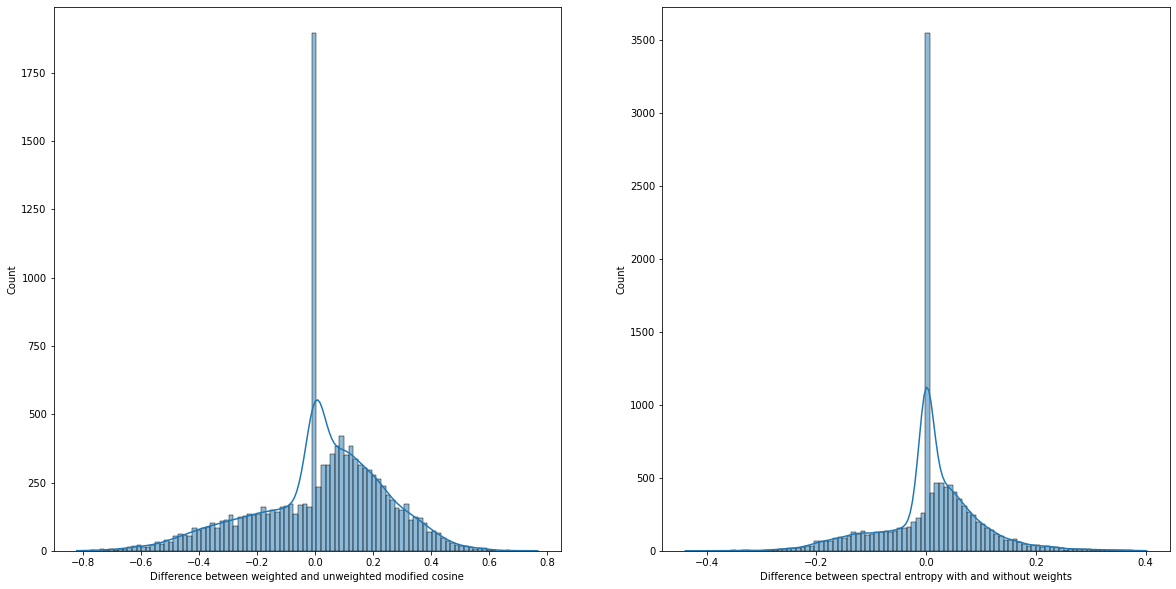

In [25]:
# Make two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(
    all_similarities_high_tanimoto['modified_cosine_difference'],
    bins=100,
    kde=True,
    ax=ax1,
)

ax1.set_xlabel('Difference between weighted and unweighted modified cosine')


# plot entropy_difference

sns.histplot(
    all_similarities_high_tanimoto['entropy_difference'],
    bins=100,
    kde=True,
    ax=ax2,
)

ax2.set_xlabel('Difference between spectral entropy with and without weights')

plt.show()


The plot above shows how the weights tend to yield larger similarity scores than without weights for scores with Tanimoto coefficient between 0.8 and 1

In [26]:
import pyteomics.mgf
import spectrum_utils.spectrum as sus
import spectrum_utils.plot as sup
import numpy as np

from rdkit import Chem

In [27]:
# Spectra and spectrum pairs to include with the following settings.
charges = 0, 1
min_n_peaks = 6
fragment_mz_tolerance = 0.1
min_mass_diff = 1    # Da
max_mass_diff = 200    # Da

def is_centroid(intensity_array):
    return np.all(intensity_array > 0)

spectra_dict = {}

# Download from https://zenodo.org/record/6829249/files/ALL_GNPS_NO_PROPOGATED.mgf?download=1
filename = ("../../data/ALL_GNPS_NO_PROPOGATED.mgf")

with pyteomics.mgf.MGF(filename) as f_in:
    for spectrum_dict in tqdm(f_in):
        if (
            int(spectrum_dict["params"]["libraryquality"]) <= 3 and
            int(spectrum_dict["params"]["charge"][0]) in charges and
            float(spectrum_dict["params"]["pepmass"][0]) > 0 and
            len(spectrum_dict["m/z array"]) >= min_n_peaks and
            spectrum_dict["params"]["ionmode"] == "Positive" and
            spectrum_dict["params"]["name"].rstrip().endswith(" M+H") and
            is_centroid(spectrum_dict["intensity array"]) and
            (
                spectrum_dict["params"]["inchi"] != "N/A" or
                spectrum_dict["params"]["smiles"] != "N/A"
            )
        ):

            spec = sus.MsmsSpectrum(
                spectrum_dict["params"]["spectrumid"],
                float(spectrum_dict["params"]["pepmass"][0]),
                # Re-assign charge 0 to 1.
                max(int(spectrum_dict["params"]["charge"][0]), 1),
                spectrum_dict["m/z array"],
                spectrum_dict["intensity array"]/max(spectrum_dict["intensity array"]),
            )
            spec.library = spectrum_dict["params"]["organism"]
            spec.inchi = spectrum_dict["params"]["inchi"]
            spec.smiles = spectrum_dict["params"]["smiles"]
            spec.remove_precursor_peak(0.1, "Da")
            spec.filter_intensity(0.01)
            
            spectra_dict[spectrum_dict["params"]["spectrumid"]] = spec


0it [00:00, ?it/s]

495600it [02:36, 3159.46it/s] 


In [28]:
metadata = pd.read_csv(
    'https://zenodo.org/record/6829249/files/gnps_libraries_metadata.csv?download=1'
)

# Convert to a dict with spectrum id as key and metadata as value.
metadata_dict = {
    row["id"]: row
    for _, row in metadata.iterrows()
    if row["id"]
}

Load data to make the plots

In [31]:
weights_df = pd.read_csv(
    's3://enveda-data-user/chloe.engler/cosine_similarity/Wout_data/mz_weight_df.csv',
    index_col=0,
)

In [32]:
def weight_spectrum(spectrum, intensity_weights, mz_weight_df):
    """Weight the spectrum with the intensity weights and the mz weights."""
    # normalize mz to 1 decimal to get their weights

    rounded_mz = np.round(spectrum.mz, 1)
    weighted_intensity = intensity_weights(spectrum.intensity) * mz_weight_df.loc[rounded_mz, 'weight']
    return sus.MsmsSpectrum(
        spectrum.identifier,
        spectrum.precursor_mz,
        spectrum.precursor_charge,
        spectrum.mz,
        weighted_intensity,
    )

def align_spectra(spec_1, spec_2, cosine_score):
    """Subset the spectra to the matched peaks and return the aligned spectra"""
    return (
        sus.MsmsSpectrum(
            identifier=spec_1.identifier,
            precursor_mz=spec_1.precursor_mz,
            precursor_charge=spec_1.precursor_charge,
            mz=spec_1.mz[cosine_score.matched_indices],
            intensity=spec_1.intensity[cosine_score.matched_indices],
            retention_time=spec_1.retention_time,
        ),
        sus.MsmsSpectrum(
            identifier=spec_2.identifier,
            precursor_mz=spec_2.precursor_mz,
            precursor_charge=spec_2.precursor_charge,
            mz=spec_2.mz[cosine_score.matched_indices_other],
            intensity=spec_2.intensity[cosine_score.matched_indices_other],
            retention_time=spec_2.retention_time,
        ))

def plot_pairs(pairs):

    # Make a GridPlot with two columns and 10 rows
    fig = plt.figure(constrained_layout=True, figsize=(15, 20))

    gs = GridSpec(10, 7, figure=fig)

    for i, (pair_1, pair_2, tanimoto, original_sim, with_weights_sim) in enumerate(pairs):

        # get the spectrum objects
        spec_1 = spectra_dict[pair_1]
        spec_2 = spectra_dict[pair_2]

        # Run modified cosine similarity
        cosine_score = modified_cosine(
            spectrum1=spec_1,
            spectrum2=spec_2,
            fragment_mz_tolerance=0.1,
        )

        spec1_aligned, spec2_aligned = align_spectra(
            spec_1,
            spec_2,
            cosine_score,
        )

        # plot a mirror plot
        ax = fig.add_subplot(gs[i, 0]) 
        sup.mirror(spec1_aligned, spec2_aligned, ax=ax)

        # Add columns with the similarity scores
        ax = fig.add_subplot(gs[i, 1])
        ax.text(0, 0.5, round(cosine_score.score, 2), size=24)
        # remove the axis
        ax.axis('off')

        """With weights"""

        weighted_spectrum_1 = weight_spectrum(
            spectrum=spec_1,
            intensity_weights = lambda x: x**(1/4),
            mz_weight_df=weights_df,
        )

        weighted_spectrum_2 = weight_spectrum(
            spectrum=spec_2,
            intensity_weights = lambda x: x**(1/4),
            mz_weight_df=weights_df,
        )

        # Run modified cosine similarity
        cosine_score = modified_cosine(
            spectrum1=weighted_spectrum_1,
            spectrum2=weighted_spectrum_2,
            fragment_mz_tolerance=0.1,
        )

        spec1_aligned, spec2_aligned = align_spectra(
            weighted_spectrum_1,
            weighted_spectrum_2,
            cosine_score,
        )

        # plot a mirror plot
        ax = fig.add_subplot(gs[i, 2]) 
        sup.mirror(spec1_aligned, spec2_aligned, ax=ax)

        # Add columns with the similarity scores
        ax = fig.add_subplot(gs[i, 3])
        ax.text(0, 0.5, round(cosine_score.score, 2), size=24)
        ax.axis('off')


        # get the smiles
        smiles_1 = metadata_dict[pair_1]['smiles']
        smiles_2 = metadata_dict[pair_2]['smiles']

        # plot the smiles of the first spectrum
        ax = fig.add_subplot(gs[i, 4])
        ax.imshow(Chem.Draw.MolToImage(Chem.MolFromSmiles(smiles_1), size=(200, 200)))

        ax = fig.add_subplot(gs[i, 5])
        ax.imshow(Chem.Draw.MolToImage(Chem.MolFromSmiles(smiles_2), size=(200, 200)))

        ax = fig.add_subplot(gs[i, 6])
        ax.text(0, 0.5, round(tanimoto, 2), size=24)
        ax.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.show()

Visualize the differences for the pairs of spectra that modified cosine does better without weights (top 10 based on similarity difference)

/var/folders/1y/p6yz3m4j4jv20rp8bxh93sth0000gn/T/ipykernel_22767/2877324505.py:123: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0)


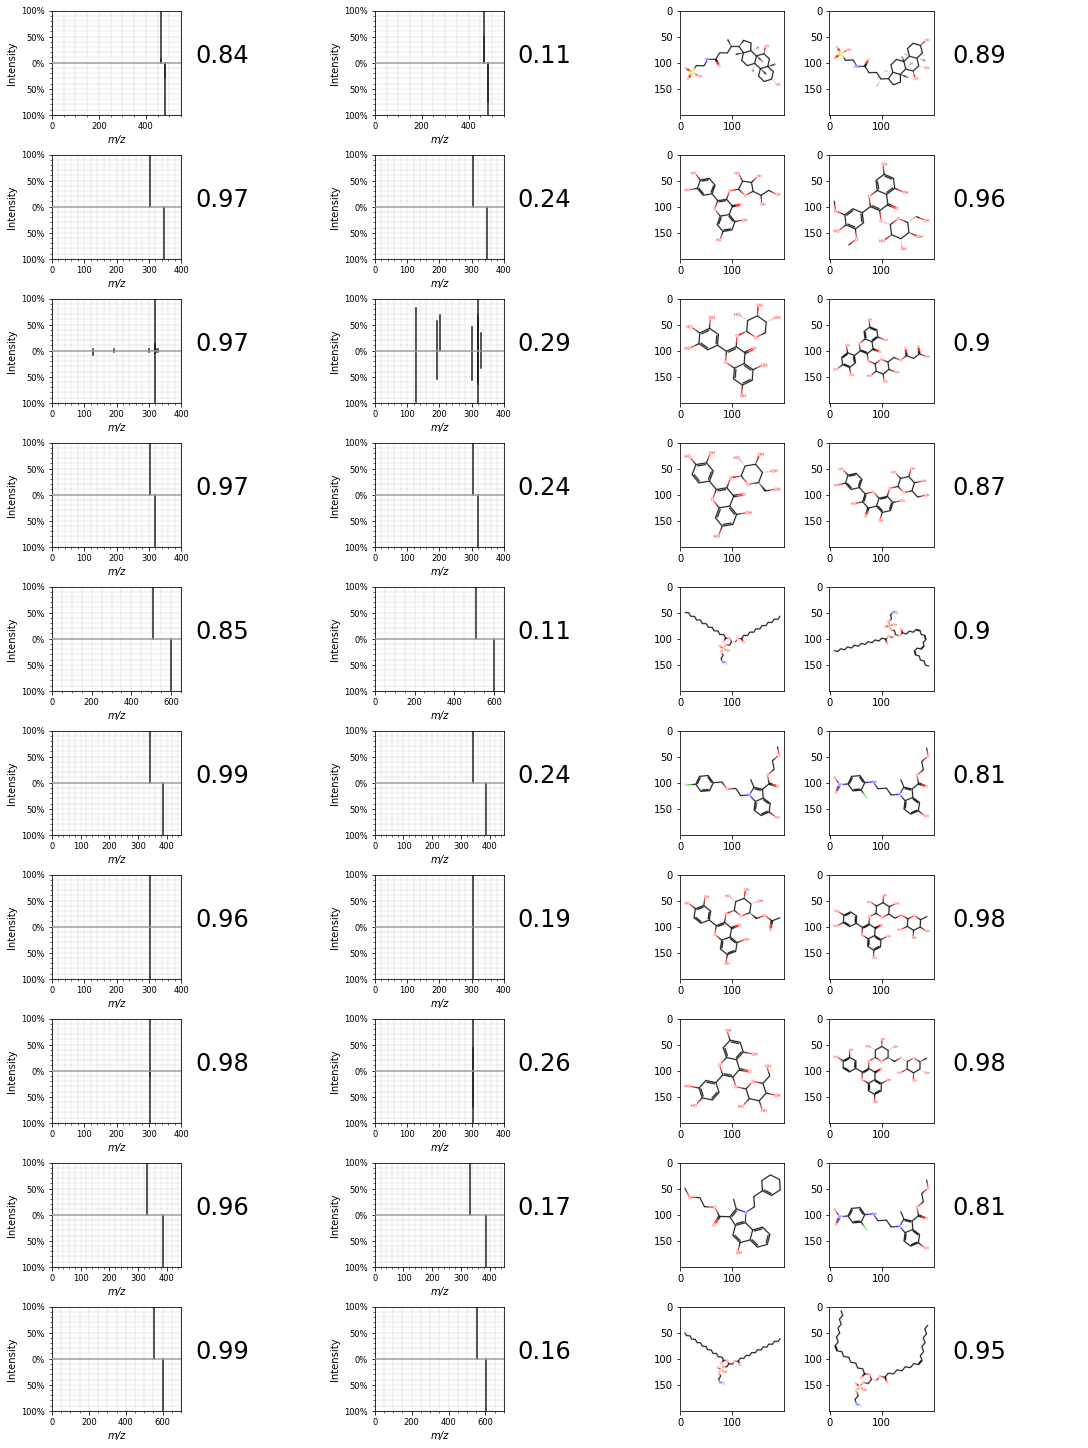

In [33]:
plot_pairs(last_10)

Visualize the differences for the pairs of spectra that modified cosine similarity doesnt work but weights help (top 10 based on similarity difference)

/var/folders/1y/p6yz3m4j4jv20rp8bxh93sth0000gn/T/ipykernel_22767/2877324505.py:123: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0)


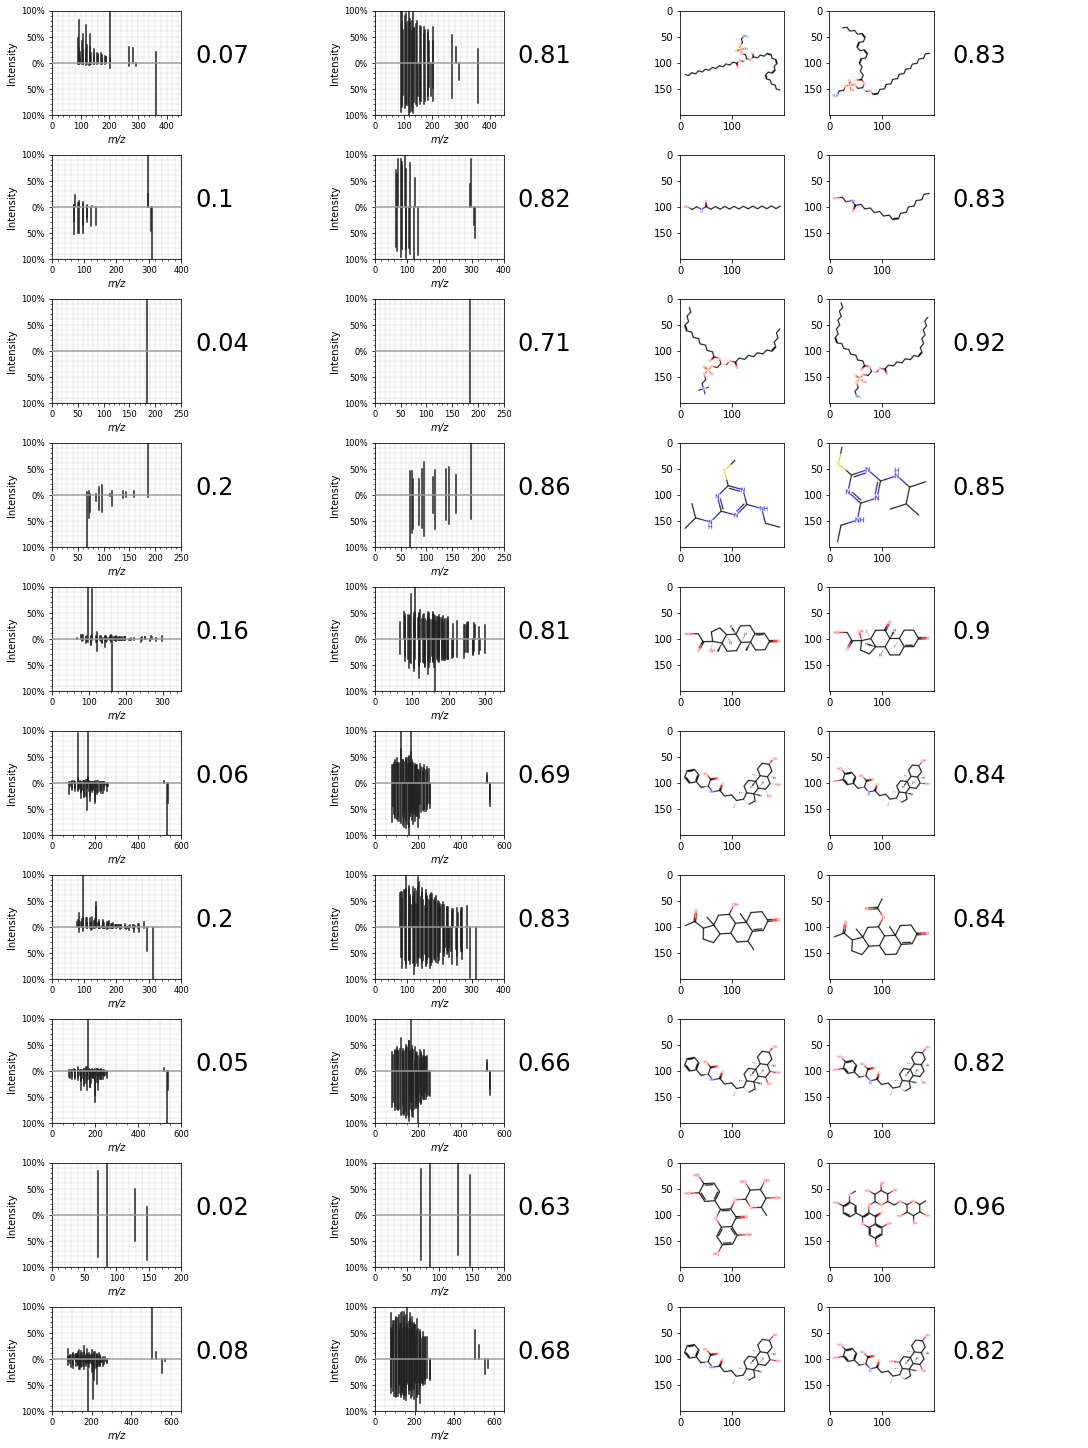

In [34]:
plot_pairs(first_10)

#### Let's look at the type of molecules where weights / no weights perform better to see if there are differences

1028
1160
21884


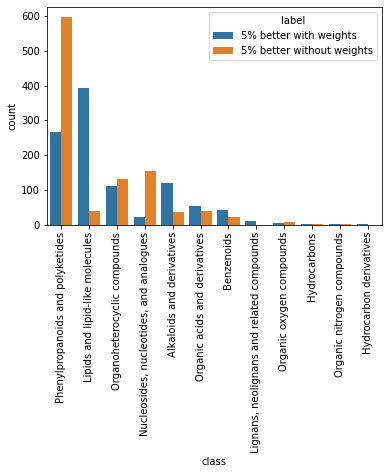

In [35]:
def flatten_array(pairs, label, molecule_type='superclass'):
    final_array = []

    for pair1, pair2 in pairs:

        # skip if the molecule type is not in the metadata
        if pd.isna(metadata_dict[pair1][molecule_type]) or pd.isna(metadata_dict[pair2][molecule_type]):
            continue

        final_array.append(metadata_dict[pair1][molecule_type])
        final_array.append(metadata_dict[pair2][molecule_type])

    print(len(final_array))

    return pd.DataFrame([
        {
            'class': i,
            'label': label
        }
        for i in final_array
    ])

df1 = flatten_array(first_5_percent, '5% better with weights')
df2 = flatten_array(last_5_percent, '5% better without weights')
df3 = flatten_array(all_similarities_high_tanimoto[['id1_x', 'id2_x']].values, 'All Tanimoto > 0.8')

# reduce df2 to the same size as df1
df2 = df2.sample(n=len(df1))

df = pd.concat([
    df1,
    df2,
    # df3,
])

sns.countplot(
    data=df,
    x='class',
    hue='label',
    order=df['class'].value_counts().index,
)


# x label rotation
plt.xticks(rotation=90)

plt.show()

1006
1150
21180


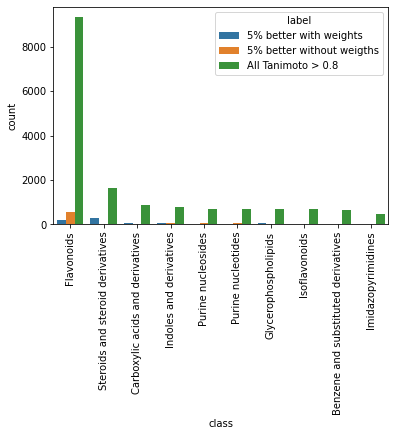

In [36]:
df1 = flatten_array(first_5_percent, '5% better with weights', 'class')
df2 = flatten_array(last_5_percent, '5% better without weigths', 'class')

# reduce df2 to the same size as df1 (df1 has some cases where there are no NPClassifier predictions for the smiles)
df2 = df2.sample(n=len(df1))

df = pd.concat([
    df1,
    df2,
    flatten_array(all_similarities_high_tanimoto[['id1_x', 'id2_x']].values, 'All Tanimoto > 0.8', 'class'),
])

sns.countplot(
    data=df,
    x='class',
    hue='label',
    order=[
        mol_class
        for i, mol_class in enumerate(df['class'].value_counts().index)
        if i < 10
    ],
)

# x label rotation
plt.xticks(rotation=90)

plt.show()

Exploring the tip of the original distribution (highly similar pairs)

In [37]:
all_similarities_high_tanimoto[
    all_similarities_high_tanimoto['modified_cosine'] > 0.95
].shape[0]

1295

In [38]:
all_similarities_high_tanimoto[
    all_similarities_high_tanimoto['weighted_modified_cosine'] > 0.95
].shape[0]

89

In [39]:
highly_similar_pairs_cosine = all_similarities_high_tanimoto[
    all_similarities_high_tanimoto['modified_cosine'] > 0.95
]

rest_high_tanimoto = all_similarities_high_tanimoto[
    all_similarities_high_tanimoto['modified_cosine'] <= 0.95
]

In [40]:
mpl.rcParams['figure.dpi'] = 400

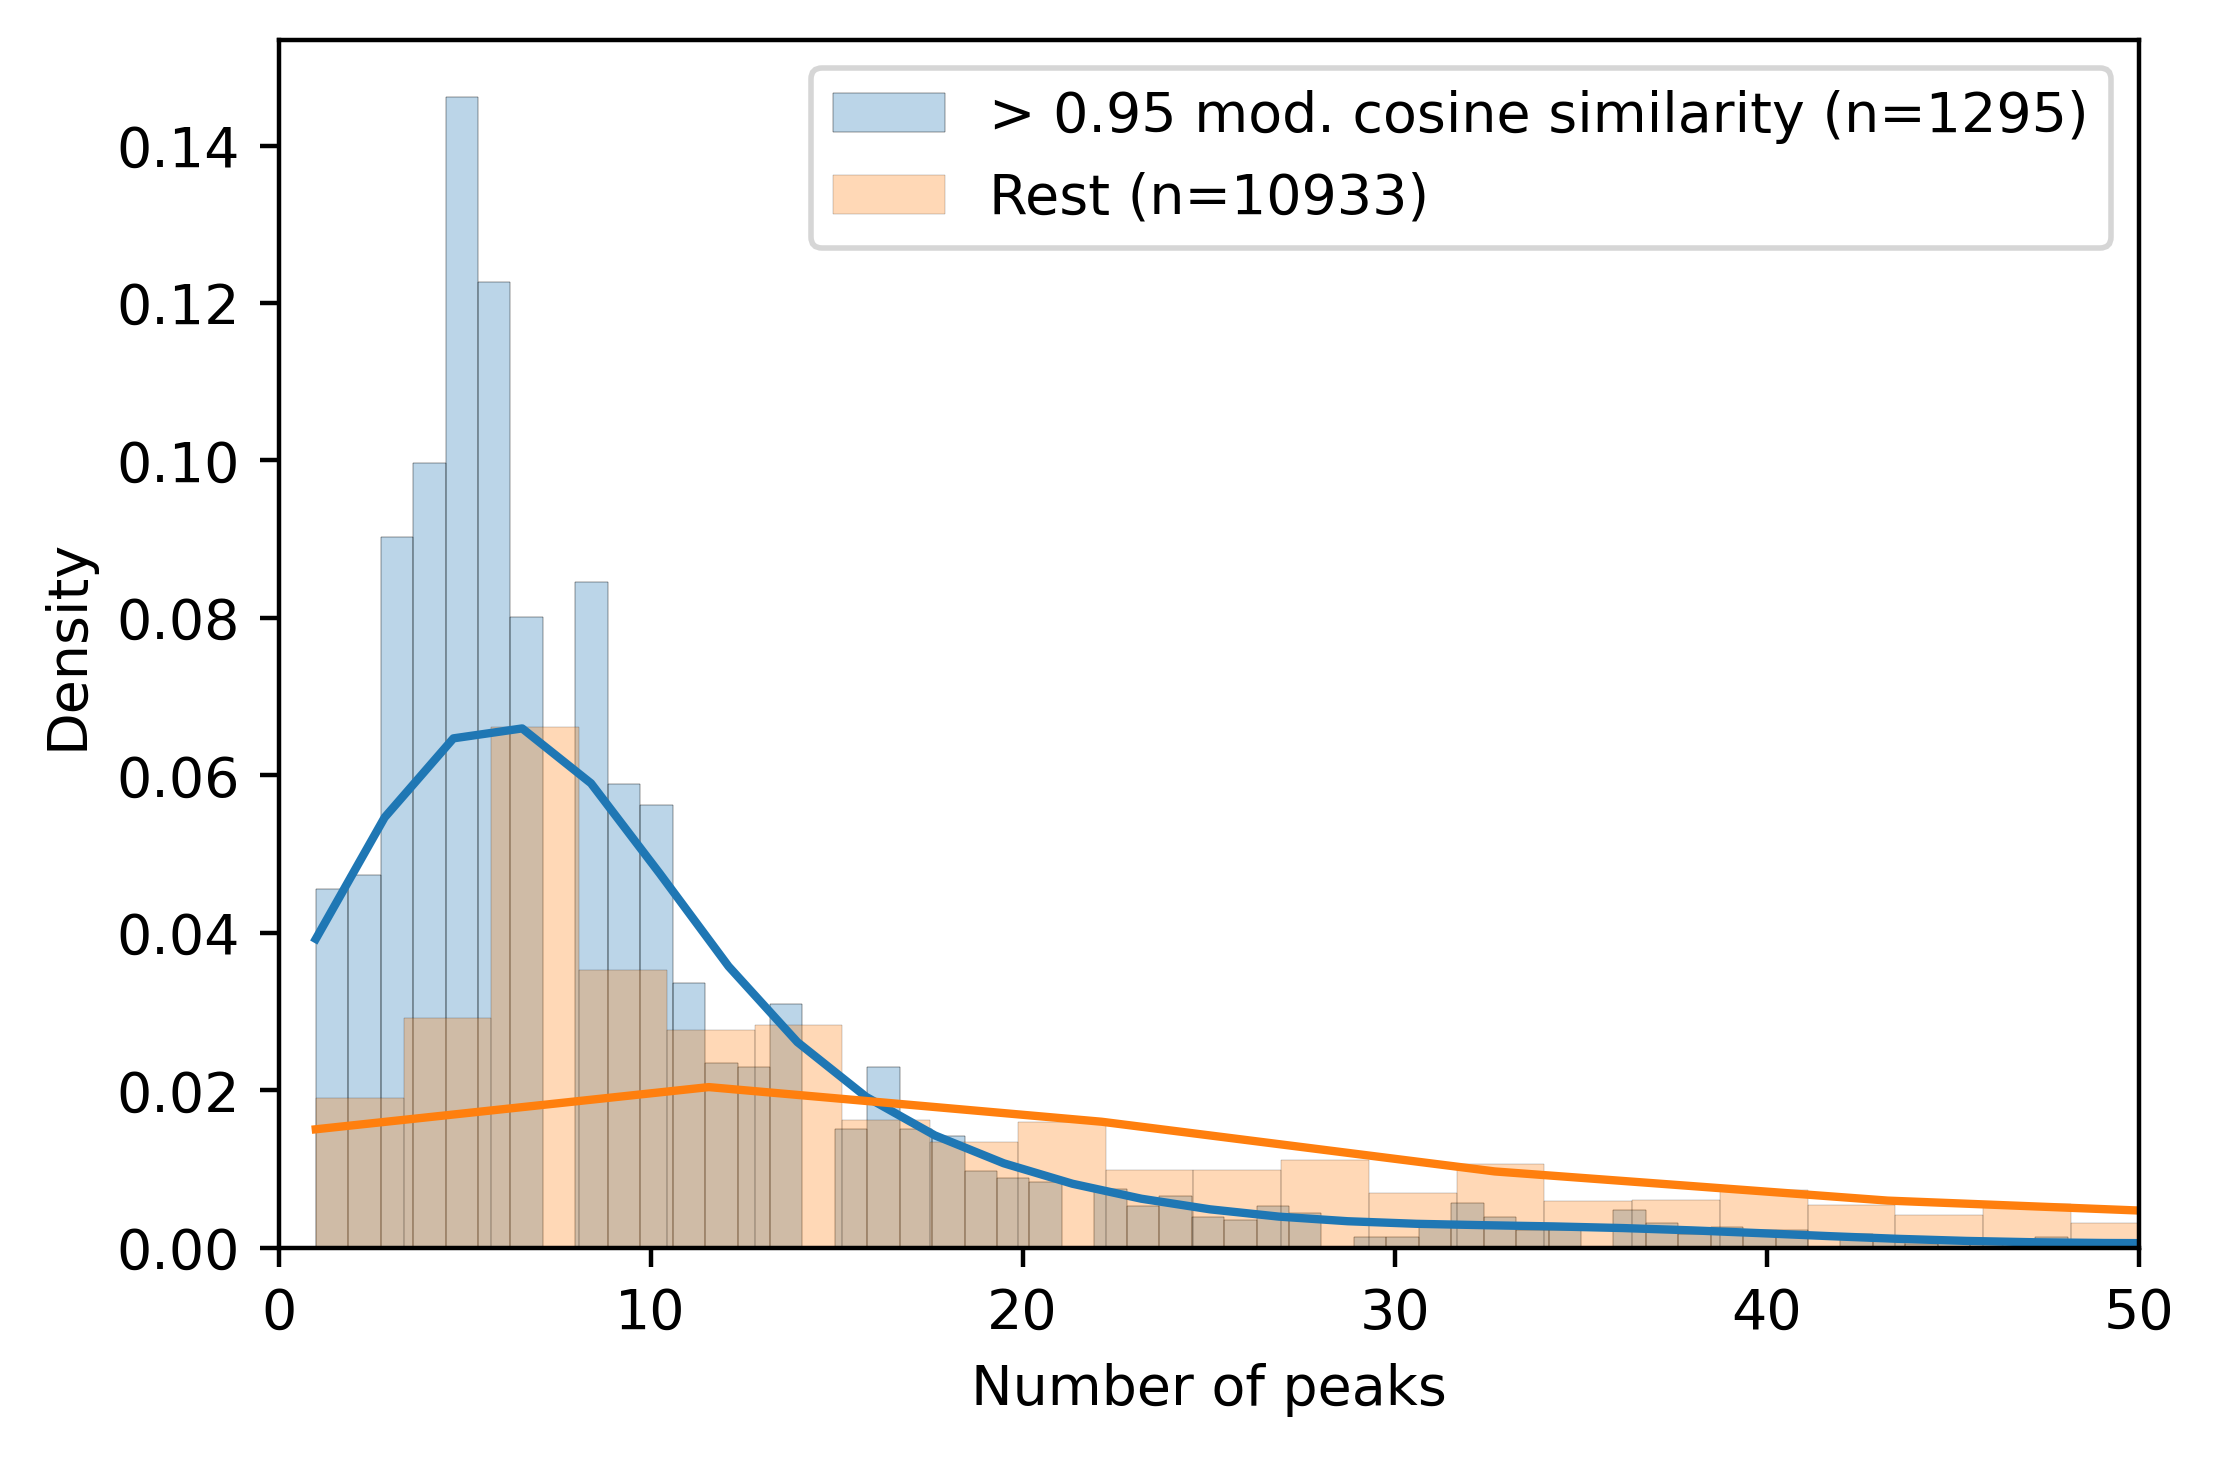

In [41]:
def df_to_array(
    df: pd.DataFrame,
):
    return np.array([
        (
            spectra_dict[pair[0]].mz.size,
            spectra_dict[pair[1]].mz.size
        )
        for pair in df[['id1_x', 'id2_x']].values
    ]).flatten()

sns.histplot(
    df_to_array(highly_similar_pairs_cosine),
    kde=True,
    stat='density',
    label=f'> 0.95 mod. cosine similarity (n={highly_similar_pairs_cosine.shape[0]})',
    alpha=0.3,
)
sns.histplot(
    df_to_array(rest_high_tanimoto),
    kde=True,
    stat='density',
    label=f'Rest (n={rest_high_tanimoto.shape[0]})',
    alpha=0.3,
)

# set x limit to 0-100
plt.xlim(0, 50)

# x label
plt.xlabel('Number of peaks')

plt.legend()
plt.show()

Same plot as a violin

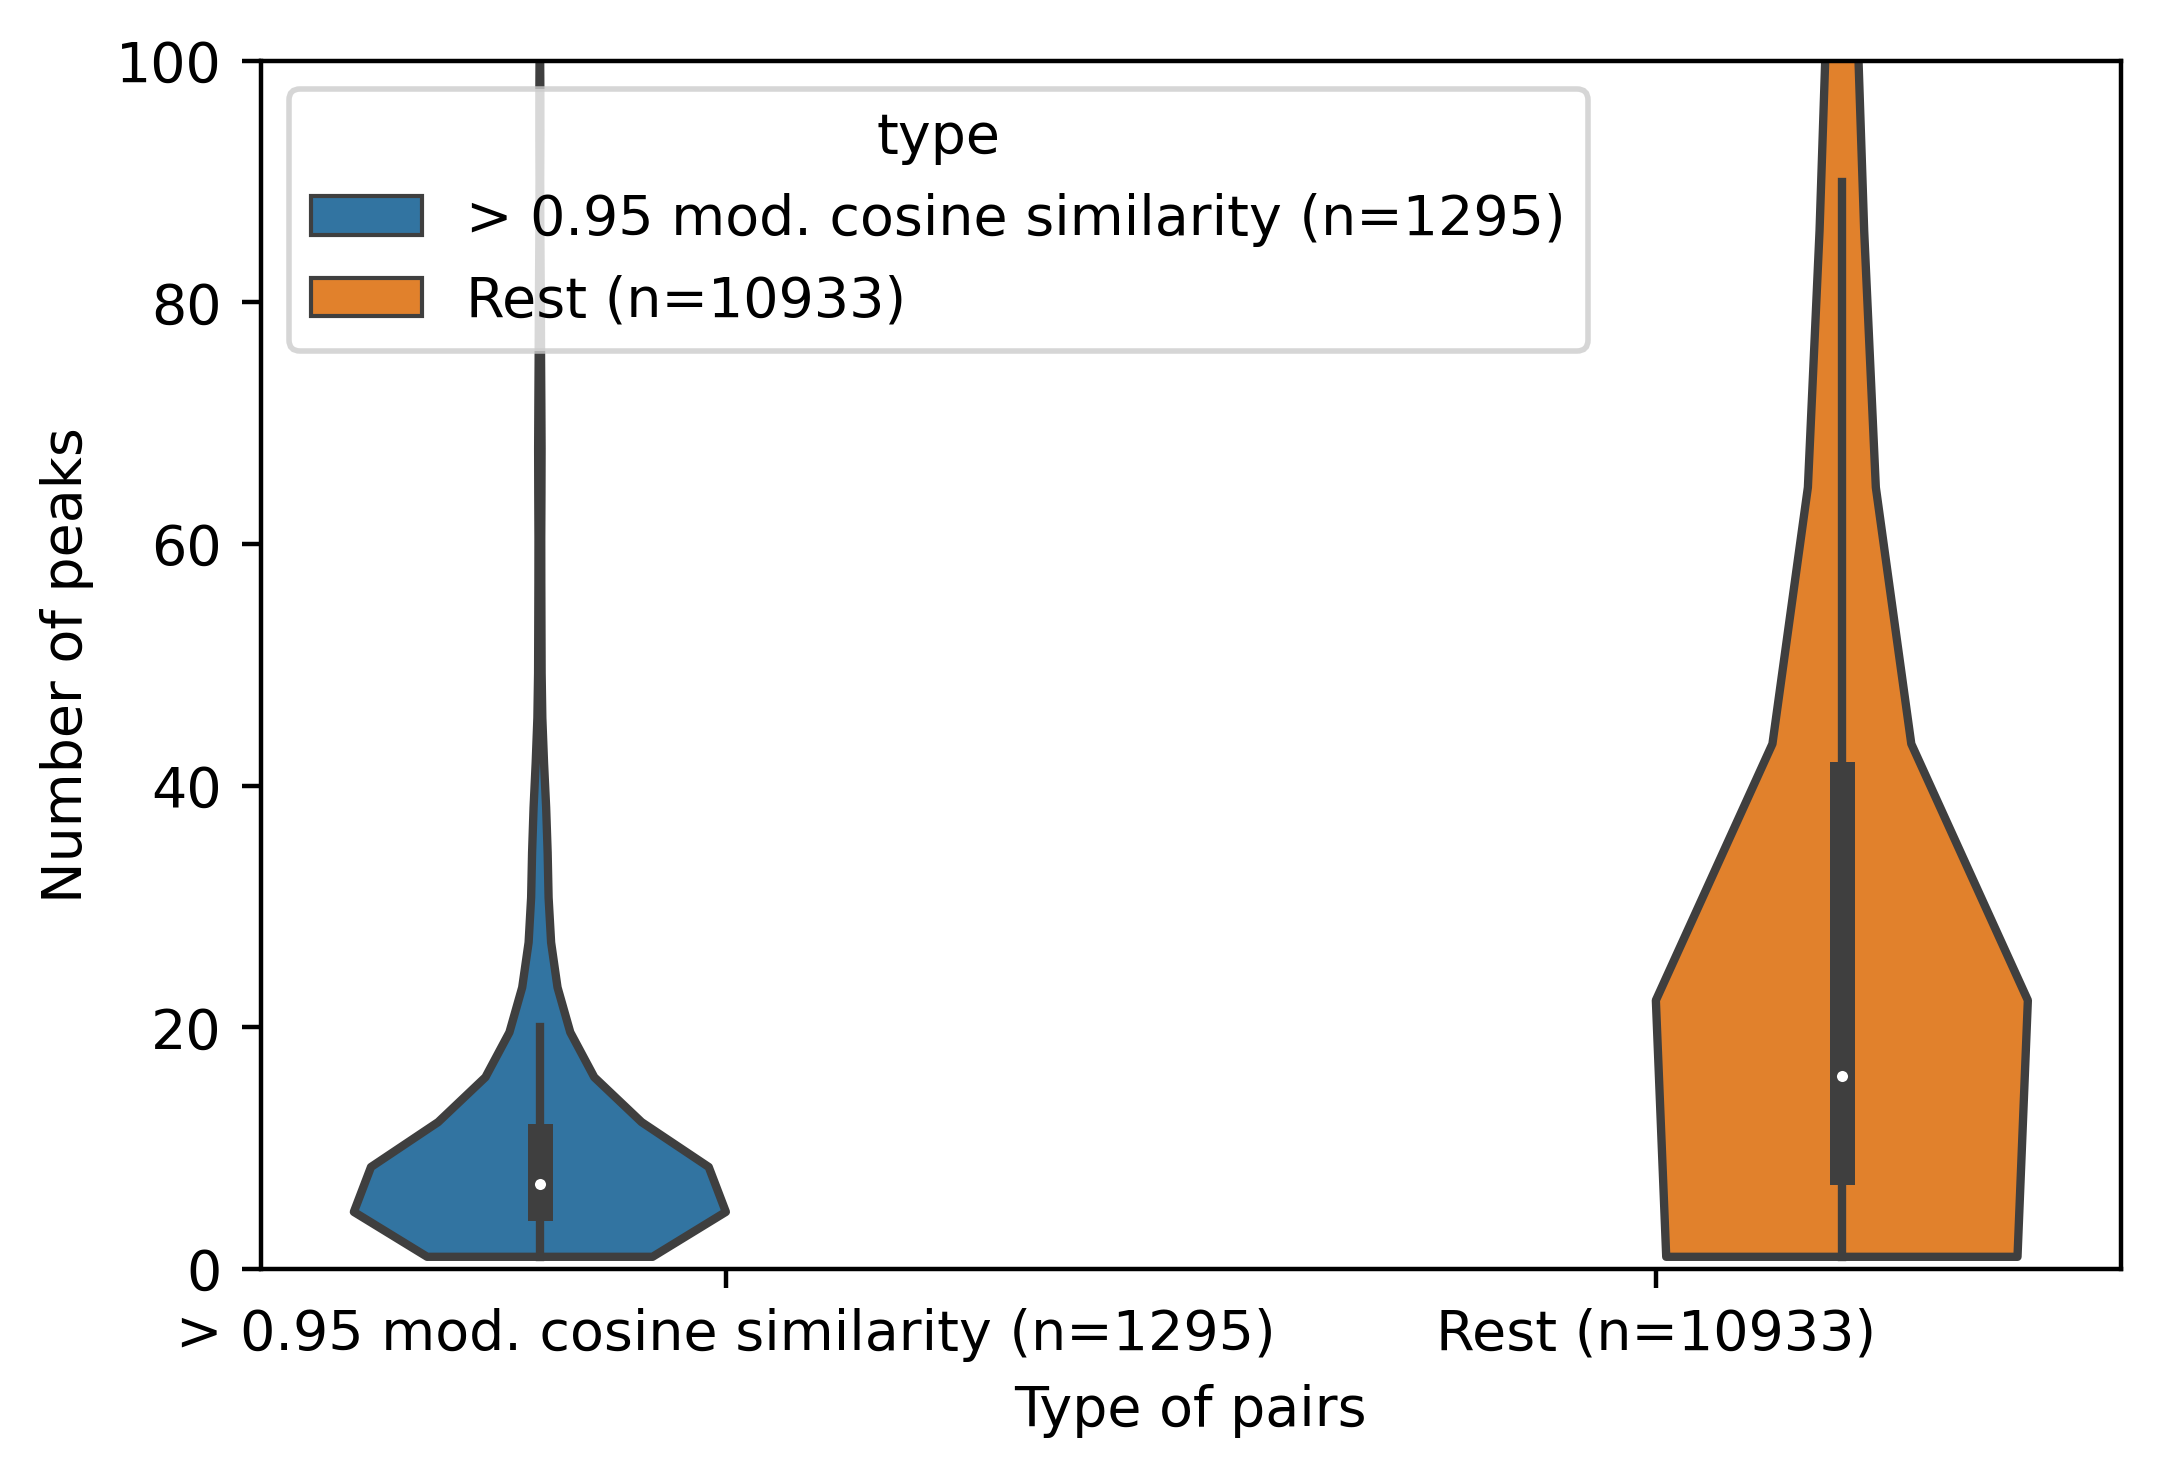

In [42]:
# plot two distributions together in a single plot

n_size_high_cosine = highly_similar_pairs_cosine.shape[0]
n_size_rest = rest_high_tanimoto.shape[0]


number_of_peaks = pd.concat([
pd.DataFrame([{
        'number_of_peaks': n_peaks,
        'type': f'> 0.95 mod. cosine similarity (n={n_size_high_cosine})',
    }
    for n_peaks in df_to_array(highly_similar_pairs_cosine)
]),
pd.DataFrame([{
        'number_of_peaks': n_peaks,
        'type': 'Rest (n={})'.format(n_size_rest),
    }
    for n_peaks in df_to_array(rest_high_tanimoto)
]),
], ignore_index=True,
)


sns.violinplot(
    data=number_of_peaks,
    x="type",
    y="number_of_peaks",
    hue="type",
    cut=0,
    scale="width",
    scale_hue=False,
)

# set x axis labels
plt.xlabel("Type of pairs")
# set y axis labels
plt.ylabel("Number of peaks")

# set y axis limits
plt.ylim(0, 100)

plt.show()

Mean (# peaks) in the structurally similar pairs (Tanimoto > 0.8)

In [43]:
np.mean(np.array([
    (
        spectra_dict[pair[0]].mz.size,
        spectra_dict[pair[1]].mz.size
    )
    for pair in all_similarities_high_tanimoto[['id1_x', 'id2_x']].values
]).flatten())

36.24484789008832

Mean (# peaks) in the structurally similar pairs (Tanimoto > 0.8) with modified cosine > 0.95 sim

In [44]:
np.mean(np.array([
    (
        spectra_dict[pair[0]].mz.size,
        spectra_dict[pair[1]].mz.size
    )
    for pair in highly_similar_pairs_cosine[['id1_x', 'id2_x']].values
]).flatten())

11.27065637065637

Mean (# peaks) in the full dataset

In [45]:
np.mean(np.array([
    (
        spectra_dict[pair[0]].mz.size,
        spectra_dict[pair[1]].mz.size
    )
    for pair in all_similarities[['id1_x', 'id2_x']].values
]).flatten())

37.339706770504044

Look at the number of "dominant" peaks

100%|██████████| 10933/10933 [00:00<00:00, 34332.15it/s]


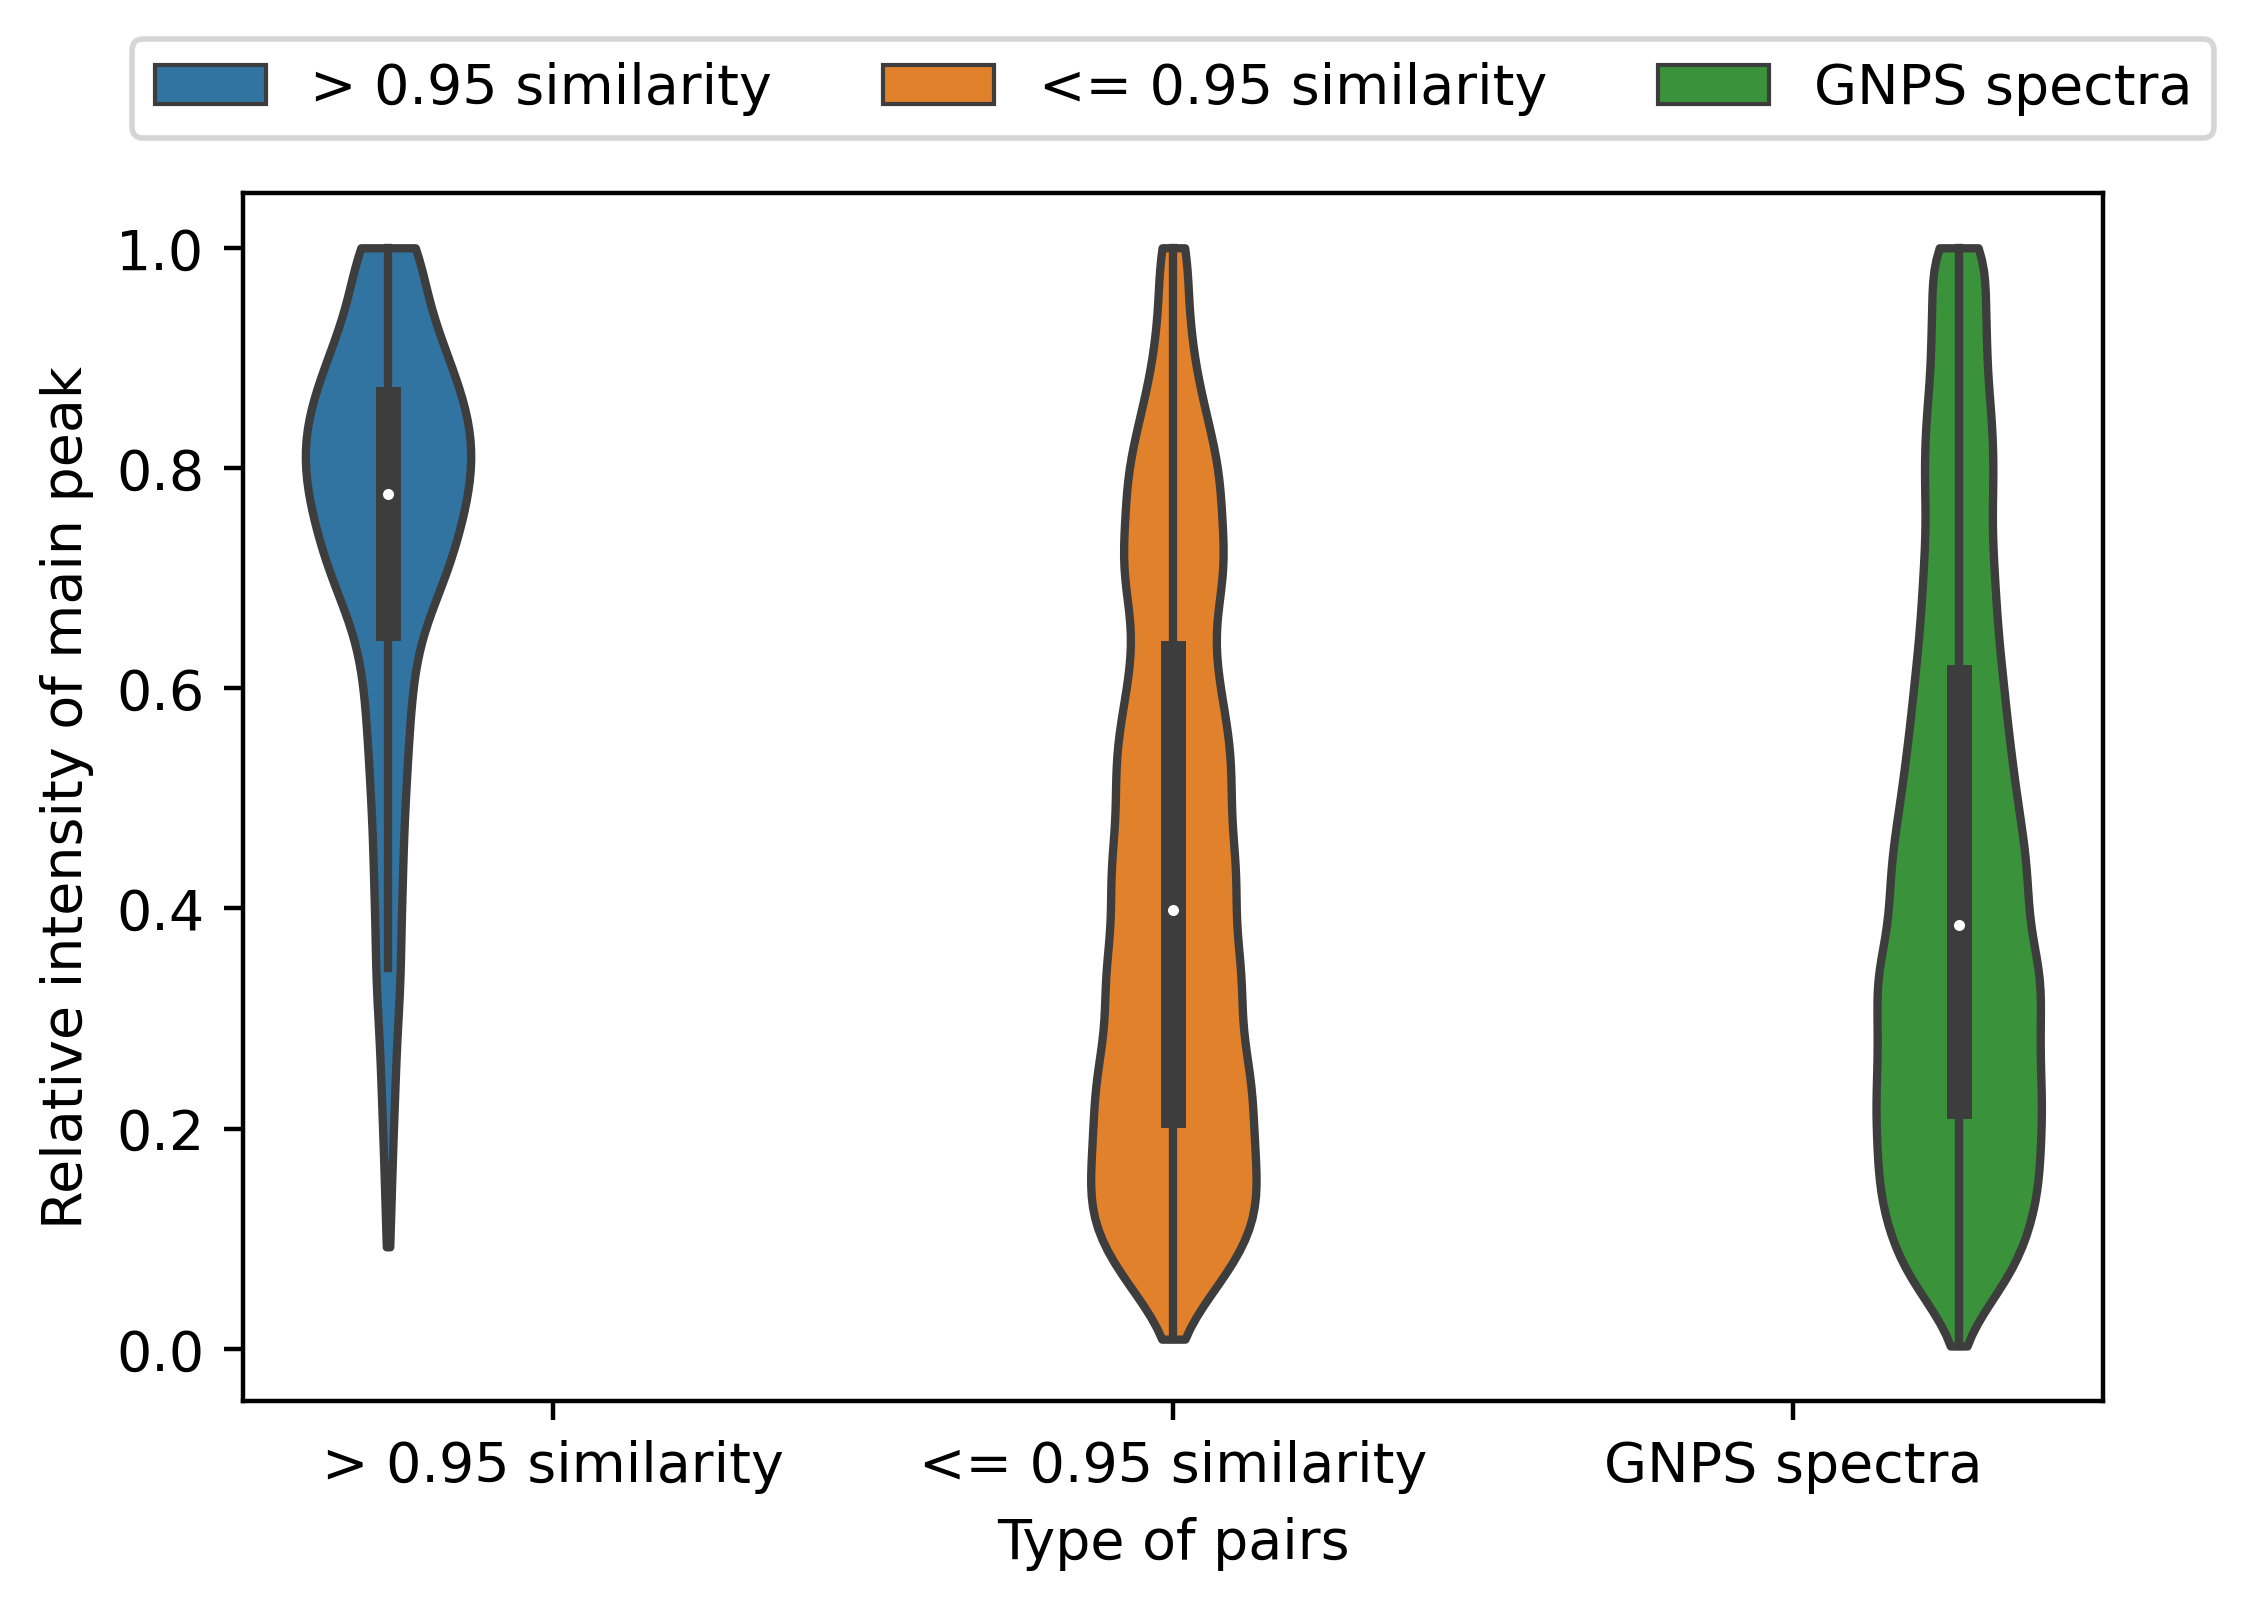

In [51]:
def relative_intensity_main_peak(
    df: pd.DataFrame,
):
    relative_intensity_main_peak_list = []

    for i, j in tqdm(df[['id1_x', 'id2_x']].values, total=df.shape[0]):
        relative_intensity_main_peak_list.append(max(spectra_dict[i].intensity / spectra_dict[i].intensity.sum()))
        relative_intensity_main_peak_list.append(max(spectra_dict[j].intensity / spectra_dict[j].intensity.sum()))
    
    return relative_intensity_main_peak_list


relative_intensity_main_peak_df = pd.concat([
    pd.DataFrame([{
            'rel_int_main_peak': rel_intensity,
            'type': f'> 0.95 similarity',
        }
        for rel_intensity in relative_intensity_main_peak(highly_similar_pairs_cosine)
    ]),
    pd.DataFrame([{
            'rel_int_main_peak': rel_intensity,
            'type': '<= 0.95 similarity',
        }
        for rel_intensity in relative_intensity_main_peak(rest_high_tanimoto)
    ]),
    pd.DataFrame([{
            'rel_int_main_peak': max(spec.intensity / spec.intensity.sum()),
            'type': 'GNPS spectra',
        }
        for spec in spectra_dict.values()
    ]),
], ignore_index=True,
)


sns.violinplot(
    data=relative_intensity_main_peak_df,
    x="type",
    y="rel_int_main_peak",
    hue="type",
    cut=0,
    scale="width",
    scale_hue=False,
)

# set x axis labels
plt.xlabel("Type of pairs")
# set y axis labels
plt.ylabel("Relative intensity of main peak")

# legend position top middle
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=3)

plt.show()